## Jupyter notebooks for BLaSA analysis and predictions
- Jupyter notebooks are a sequence of cells, whose output is stored
- Cells must be run for their output to be used
- Click on a cell or use <kbd>&#8593;</kbd> <kbd>&#8595;</kbd> keys to select
- To execute a cell type <kbd>ctrl</kbd>+<kbd>enter</kbd>

In [2]:
import os, time, glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
from IPython.display import Image

## Location of data files

In [3]:
with open("../input.json", "r") as f:
    input_data = json.load(f)
dump_folder = os.path.join('../run',input_data['dump_folder'])
print(dump_folder)
a0 = input_data['potential']['a0']

../run/sample_data


# Bond Correlation Analysis
## Pick parameters and load joint histograms
 For joint histograms to be generated the `JointHist` parameter in `input.json` must be set to `1`

In [17]:
# Specify as strings to guarantee match with filename
JH_RT = '0.1' # Relative Transverse strength
JH_T = '400' # Temperature
JH_am = '1.0' # Relative Lattice Parameter == 1 + Strain 

Lattice_Type = 1 # 0,1,2 = fcc 110 ,bcc 111, bcc 111+100

MarginalHistPath = glob.glob(os.path.join(dump_folder,"r_*_RT%s*T%s*a%s*" % (JH_RT,JH_T,JH_am)))

JointHistPath = glob.glob(os.path.join(dump_folder,"H_TL_L%d_*S*_RT%s*T%s*a%s*" % (Lattice_Type,JH_RT,JH_T,JH_am)))

if len(JointHistPath) > 0 and len(MarginalHistPath)>0:
    print("Loading ",JointHistPath[0],MarginalHistPath[0])
    JointHist = np.loadtxt(JointHistPath[0])
    MarginalHist = np.loadtxt(MarginalHistPath[0])
else:
    print("Couldn't find files")

Loading  ../run/sample_data/H_TL_L1_N8_S10k_RT0.100000_T400.000000_a1.000000_M ../run/sample_data/r_H_Hp_Hd_U_L1_N8_S10k_RT0.100000_T400.000000_a1.000000_M


## Make figure

In [7]:
myc = {}
myc['r'] = (1.0,0.0,44./255.)
myc['b'] = (71./255.,0.0,167./255.)
myc['o'] = (1.0,180./255.,7./255.)
myc['g'] = (0.0/255.0,180./255.,7./255.)
lw=2.

40960000.0
1 0.04409251830806013
20480000.0
0 0.0010441878596067268
245760000.0
2 0.006159855922366721
245760000.0
3 0.0060155667674068256
1
bcc_111


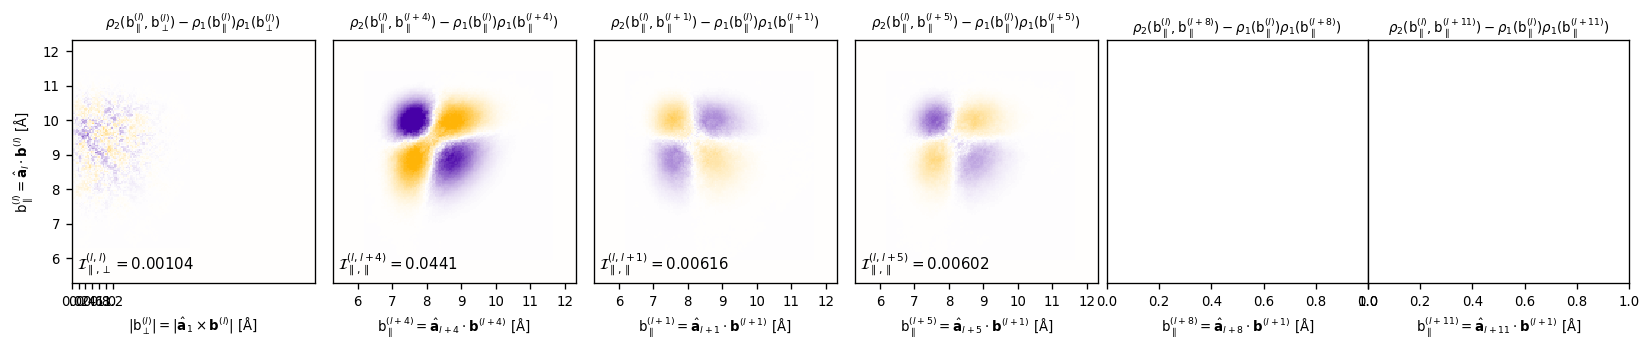

In [18]:

r = MarginalHist[:,0]
bins=r.size

H=JointHist



fig,axs=plt.subplots(1,6,figsize=(14,3),dpi=120,sharex=False,sharey=True)

tlims = [0,bins//3]#[0,700]
atlim = [r[tlims[0]]*a0-r[0]*a0,r[tlims[1]]*a0-r[0]*a0]

llims = [bins//4,bins//3+bins//4]#[500,1200]
allim = [r[llims[0]]*a0,r[llims[1]]*a0]

for j in [1,0,2,3,4,5]:
    #if j>3:
    #    #llims = [bins//4+bins//16,bins//2+bins//16]#[500,1200]
    #    #allim = [r[llims[0]]*a0,r[llims[1]]*a0]
    if Lattice_Type<2 and j>3:
        continue
    if j==0:
        M = H[(j)*bins*bins:(j+1)*bins*bins].reshape((bins,bins))[llims[0]:llims[1],tlims[0]:tlims[1]].copy()
        plim = [atlim[0],atlim[1],allim[0],allim[1]]
    else:
        M = H[(j)*bins*bins:(j+1)*bins*bins].reshape((bins,bins))[llims[0]:llims[1],llims[0]:llims[1]].copy()
        plim = [allim[0],allim[1],allim[0],allim[1]]
    print(M.sum())
    if M.sum()==0:
        continue
    M /= M.sum()
    rhol = M.sum(axis=0)
    rhor = M.sum(axis=1)
    ucjb = np.outer(rhor,rhol)
    
    sel = (ucjb>0.0) * (M>0.0)
    
    RE = -(np.log((M[sel])/ucjb[sel])*ucjb[sel]).sum()
    
    print(j,RE)
    
    M -= ucjb
    
    
    if j==1:
        mM = M.max()*0.8
    
    cm = mpl.colors.LinearSegmentedColormap.from_list('my_spec',[myc['b'],(1,1,1),myc['o']], N=200)
    
    axs[j].matshow(M,cmap=cm,extent=plim,vmin=-mM,vmax=mM)
    
    #axs[j].text(0.02,0.02,r"$\int\ln|\rho_1\rho_1/\rho_2|\rho_1\rho_1=%.3g$" % RE,\
    if j==0:
        axs[j].text(0.02,0.02,r"$\mathcal{I}^{(l,l)}_{\parallel,\perp}=%.3g$" % RE,\
             fontsize=9,transform=axs[j].transAxes,horizontalalignment='left',verticalalignment='bottom')
    else:
        axs[j].text(0.02,0.02,r"$\mathcal{I}^{(l,l+%d)}_{\parallel,\parallel}=%.3g$" % ([0,4,1,5,8,11][j],RE),\
             fontsize=9,transform=axs[j].transAxes,horizontalalignment='left',verticalalignment='bottom')
    
    
axs[0].set_title(r"$\rho_2({\rm b}^{(l)}_\parallel,{\rm b}^{(l)}_\perp)-\rho_1({\rm b}^{(l)}_\parallel)\rho_1({\rm b}^{(l)}_\perp)$",fontsize=8,pad=0)
axs[1].set_title(r"$\rho_2({\rm b}^{(l)}_\parallel,{\rm b}^{(l+4)}_\parallel)-\rho_1({\rm b}^{(l)}_\parallel)\rho_1({\rm b}^{(l+4)}_\parallel)$",fontsize=8,pad=0)
axs[2].set_title(r"$\rho_2({\rm b}^{(l)}_\parallel,{\rm b}^{(l+1)}_\parallel)-\rho_1({\rm b}^{(l)}_\parallel)\rho_1({\rm b}^{(l+1)}_\parallel)$",fontsize=8,pad=0)
axs[3].set_title(r"$\rho_2({\rm b}^{(l)}_\parallel,{\rm b}^{(l+5)}_\parallel)-\rho_1({\rm b}^{(l)}_\parallel)\rho_1({\rm b}^{(l+5)}_\parallel)$",fontsize=8,pad=0)

axs[4].set_title(r"$\rho_2({\rm b}^{(l)}_\parallel,{\rm b}^{(l+8)}_\parallel)-\rho_1({\rm b}^{(l)}_\parallel)\rho_1({\rm b}^{(l+8)}_\parallel)$",fontsize=8,pad=0)
axs[5].set_title(r"$\rho_2({\rm b}^{(l)}_\parallel,{\rm b}^{(l+11)}_\parallel)-\rho_1({\rm b}^{(l)}_\parallel)\rho_1({\rm b}^{(l+11)}_\parallel)$",fontsize=8,pad=0)


for j in range(6):
    axs[j].tick_params(labelsize=8)
    axs[j].tick_params(axis="x", bottom=True, labelbottom=True, top=False, labeltop=False)
    axs[j].tick_params(axis="y", left=False, labelleft=False, right=False, labelright=False)
axs[0].tick_params(axis="y", left=True, labelleft=True, right=False, labelright=False)
axs[0].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
axs[0].set_ylabel(r"${\rm b}^{(l)}_\parallel = \hat{\bf a}_{l}\cdot{\bf b}^{(l)}$ [$\rm\AA$]",fontsize=8)


axs[0].set_xlabel(r"$|{\rm b}^{(l)}_\perp| = |\hat{\bf a}_{1}\times{\bf b}^{(l)}|$ [$\rm\AA$]",fontsize=8)
axs[1].set_xlabel(r"${\rm b}^{(l+4)}_\parallel = \hat{\bf a}_{l+4}\cdot{\bf b}^{(l+4)}$ [$\rm\AA$]",fontsize=8)
axs[2].set_xlabel(r"${\rm b}^{(l+1)}_\parallel = \hat{\bf a}_{l+1}\cdot{\bf b}^{(l+1)}$ [$\rm\AA$]",fontsize=8)
axs[3].set_xlabel(r"${\rm b}^{(l+5)}_\parallel = \hat{\bf a}_{l+5}\cdot{\bf b}^{(l+1)}$ [$\rm\AA$]",fontsize=8)
axs[4].set_xlabel(r"${\rm b}^{(l+8)}_\parallel = \hat{\bf a}_{l+8}\cdot{\bf b}^{(l+1)}$ [$\rm\AA$]",fontsize=8)
axs[5].set_xlabel(r"${\rm b}^{(l+11)}_\parallel = \hat{\bf a}_{l+11}\cdot{\bf b}^{(l+1)}$ [$\rm\AA$]",fontsize=8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.,hspace=0.)
print(Lattice_Type)
print(["fcc_110","bcc_111","bcc_111_100"][Lattice_Type])
plt.savefig("correlations_am%s_T%sK_RT%s_%s.png" % (JH_am,JH_T,JH_RT,["fcc_110","bcc_111","bcc_111_100"][Lattice_Type]) )

bcc, 400K, RT=0.1


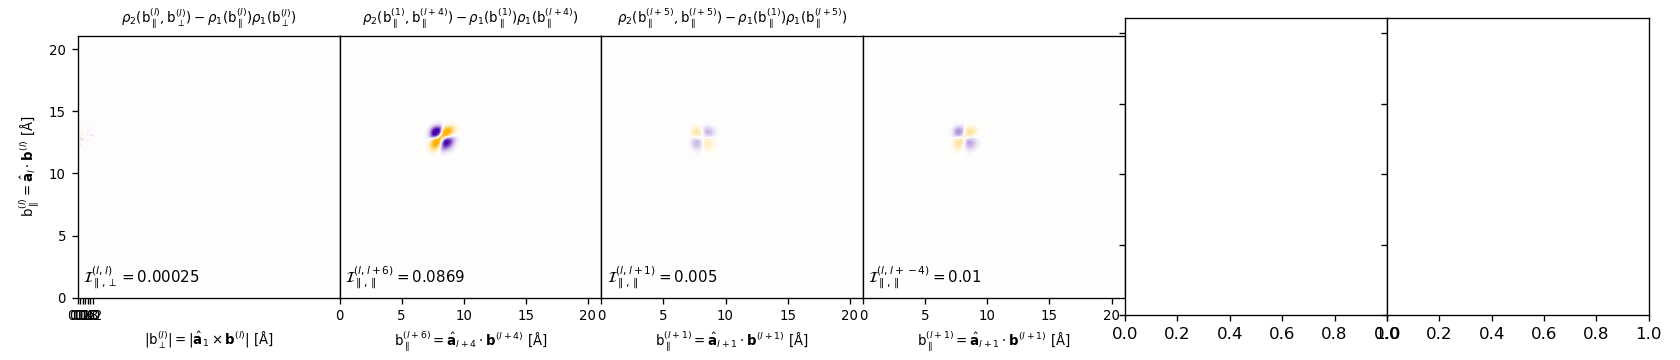

In [35]:
print("bcc, 400K, RT=0.1")
Image("correlations_am0.1_T400K_RT1.0.png")

bcc, 400K, RT=0.1


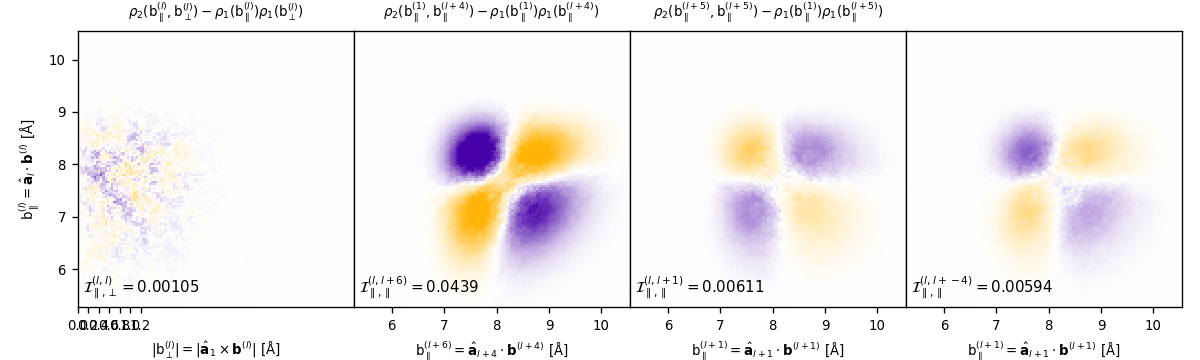

In [17]:
print("bcc, 400K, RT=0.1")
Image("correlations_am0.1_T400K_RT1.0.png")